In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./input/lending-club-loan-data/clean_loan.csv', low_memory=False)
data.head()

,Unnamed: 0,Unnamed: 0.1,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_op_past_12m,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,0,200001,20000,20000,20000,60 months,12.73,452.31,B,B5,...,0,0,0,17100,7428,13500,0,N,Cash,N
1,1,200002,10000,10000,9725,36 months,12.73,335.65,B,B5,...,1,0,0,26394,17904,11000,15394,N,Cash,N
2,2,200003,40000,40000,40000,36 months,8.46,1261.97,A,A5,...,2,0,0,376496,75188,60400,77310,N,Cash,N
3,3,200004,5000,5000,5000,36 months,6.67,153.64,A,A2,...,1,0,0,44644,13269,15300,14244,N,Cash,N
4,4,200005,14000,14000,14000,36 months,8.46,441.69,A,A5,...,0,0,0,19400,12902,8100,10000,N,Cash,N


In [3]:
def plot_feature_distplot(df, feature1):
    sns.distplot(df[feature1], hist=True, label=feature1)
    plt.legend()
    plt.show()

## Loan Amount Analysis

### Observations
    Loan requested, Loan funded and amount invested by investors is nearly same.

Median of loan amount is  14000.0


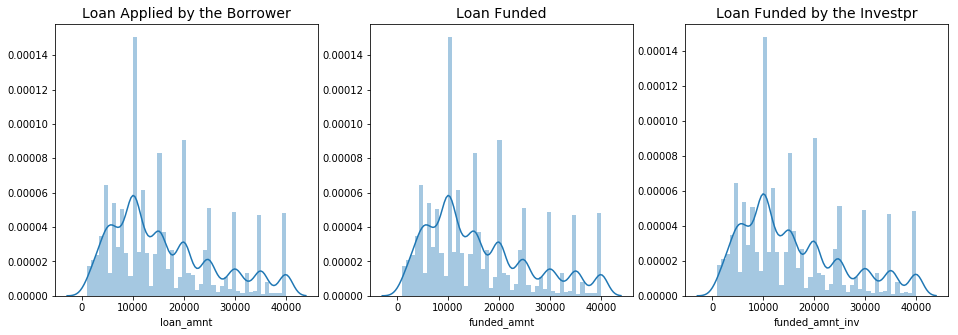

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

sns.distplot(data['loan_amnt'], ax=ax[0], label='loan_amnt')
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(data['funded_amnt'], ax=ax[1],  label='loan_amnt')
ax[1].set_title("Loan Funded", fontsize=14)
sns.distplot(data['funded_amnt_inv'], ax=ax[2],  label='loan_amnt')
ax[2].set_title("Loan Funded by the Investpr", fontsize=14)

print ('Median of loan amount is ', np.median(data['loan_amnt']))

In [5]:
data["loan_status"].value_counts()

Current               34496
Fully Paid             2496
Late (31-120 days)      514
Charged Off             245
In Grace Period         169
Late (16-30 days)        79
Default                   2
Name: loan_status, dtype: int64

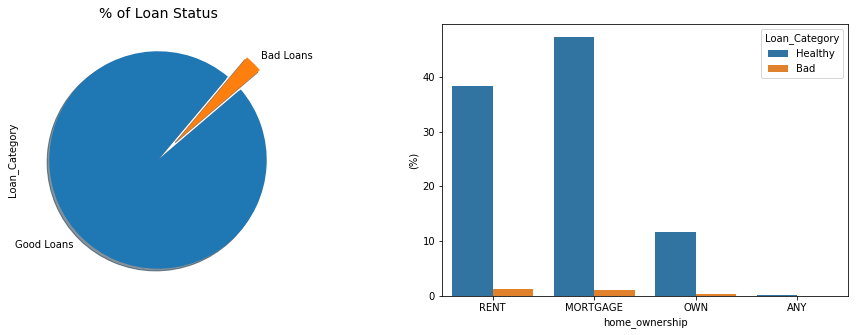

In [6]:
good_loans = ['Fully Paid','Current']

def good_or_bad_loan(loan_status):
    if loan_status in good_loans:
        return 'Healthy'
    else :
        return 'Bad'
        
data["Loan_Category"] = data['loan_status'].apply(good_or_bad_loan)

fig, ax = plt.subplots(1, 2, figsize=(16,5))
labels ="Good Loans", "Bad Loans"

ax[0].set_title("% of Loan Status", fontsize=14)
data["Loan_Category"].value_counts().plot.pie(explode=[0,0.25],labels=labels, shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="home_ownership", y="loan_amnt", hue="Loan_Category", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

plt.show()

## Interest Rate Analysis

#### Observation 1: Most Interest rates are <15%, howevere a small percentage of loands is at a very higher interest rate

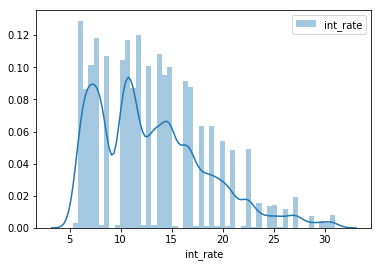

In [7]:
plot_feature_distplot(data, 'int_rate')
data_int_rates_gt_15 = data.loc[data['int_rate']>15]
data_int_rates_lt_15 = data.loc[data['int_rate']<15]

#### Relation B/w Interest Rates & Loan Amount

    For low interest rates the median loan amount is 13k for high interest rates the median loan is high.
    For low interest rates the median annual income is 68k for high interest rates the annual income is 60K

In [8]:
print ('Median of loan account where interest rates is <15%', np.median(data_int_rates_lt_15['loan_amnt']))
print ('Median of loan account where interest rates is >15%', np.median(data_int_rates_gt_15['loan_amnt']))
print ('\nMedian of loan account where interest rates is <15%', np.median(data_int_rates_lt_15['annual_inc']))
print ('Median of loan account where interest rates is >15%', np.median(data_int_rates_gt_15['annual_inc']))

Median of loan account where interest rates is <15% 13000.0
Median of loan account where interest rates is >15% 14400.0

Median of loan account where interest rates is <15% 70000.0
Median of loan account where interest rates is >15% 62000.0


In [9]:
def get_interest_rate_slabs(annual_inc):
    if annual_inc < 10 :
        return 'Low'
    elif annual_inc > 20:
        return 'V High'
    else :
        return 'High'
        
data["Income_Rate_Slabs"] = data['int_rate'].apply(get_interest_rate_slabs)

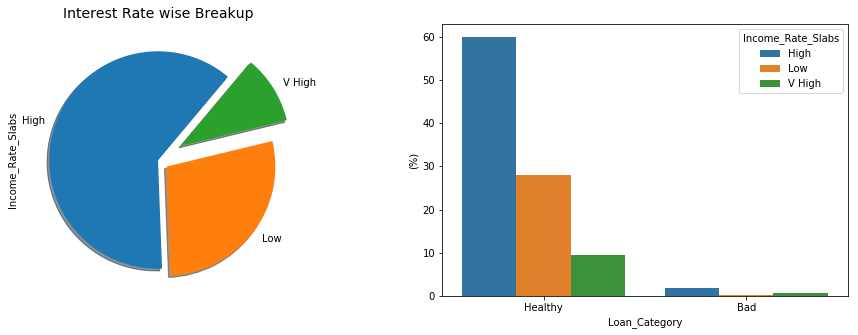

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

ax[0].set_title("Interest Rate wise Breakup", fontsize=14)
data["Income_Rate_Slabs"].value_counts().plot.pie(explode=[0,0.1,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Loan_Category", y="loan_amnt", hue="Income_Rate_Slabs", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

plt.show()

### Analysis by Income Category

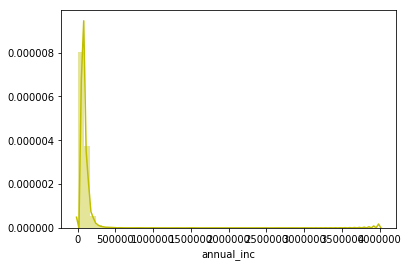

In [11]:
sns.distplot(data['annual_inc'], color='y', label='Ann Income')

In [12]:
def get_income_cat(annual_inc):
    if annual_inc < 50000 :
        return 'Poor'
    elif annual_inc > 100000:
        return 'Rich'
    else :
        return 'Medium'
        
data["Income_Category"] = data['annual_inc'].apply(get_income_cat)

In [13]:
data["Income_Category"].value_counts()

Medium    19283
Poor      10509
Rich       8209
Name: Income_Category, dtype: int64

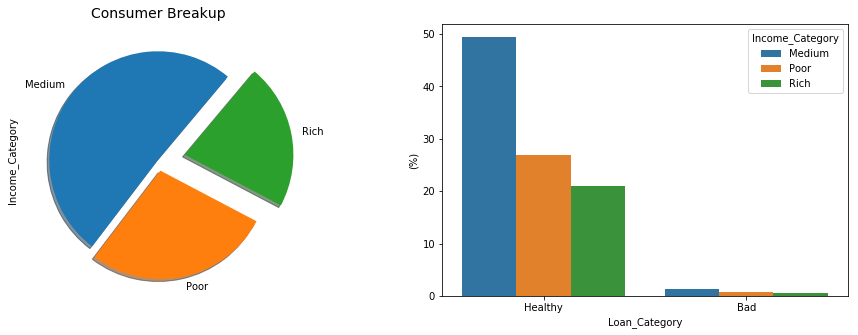

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
labels ="Medium", "Poor", "Rich"

ax[0].set_title("Consumer Breakup", fontsize=14)
data["Income_Category"].value_counts().plot.pie(explode=[0,0.1,0.25],labels=labels, shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Loan_Category", y="loan_amnt", hue="Income_Category", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

plt.show()

### Analysis by Geography

In [15]:
# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']


def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


data['region'] = data['addr_state'].apply(finding_regions)

In [16]:
data["region"].value_counts()

SouthEast    9436
NorthEast    8757
West         8353
MidWest      6777
SouthWest    4678
Name: region, dtype: int64

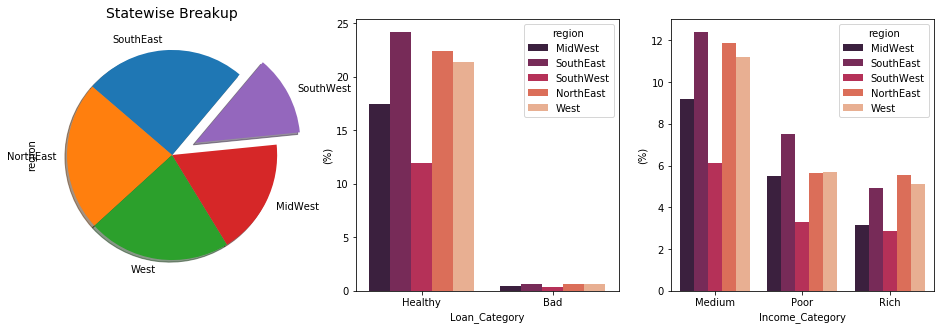

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

ax[0].set_title("Statewise Breakup", fontsize=14)
data["region"].value_counts().plot.pie(explode=[0,0,0,0,0.25], shadow=True, startangle=50, ax=ax[0])

sns.barplot(x="Loan_Category", y="loan_amnt", hue="region", ax=ax[1], palette = 'rocket', data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")

sns.barplot(x="Income_Category", y="loan_amnt", hue="region", ax=ax[2], palette = 'rocket', data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[2].set(ylabel="(%)")

plt.show()

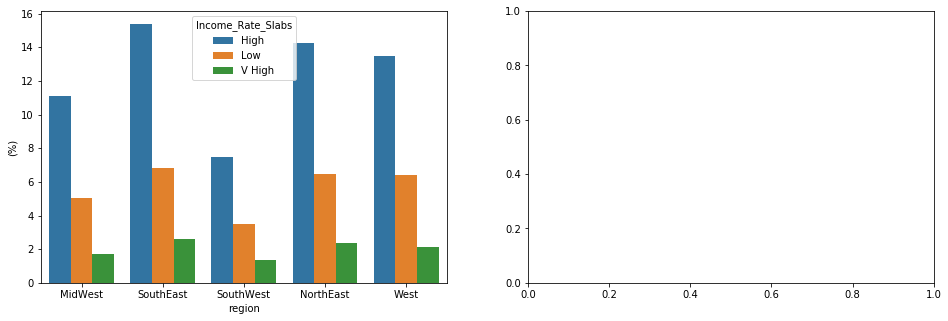

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))

sns.barplot(x="region", y="loan_amnt", ax=ax[0], hue="Income_Rate_Slabs", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[0].set(ylabel="(%)")

plt.show()

### Analysis by Employment Age - WIP

In [19]:
def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


data['region'] = data['addr_state'].apply(finding_regions)